**Загрузите файл HR.csv в pandas dataframe**

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Типы данных в столбцах в целом соответстующие, но стоит поменять типы в столбцах Work_accident, left, promotion_last_5years, salary с int и object на category. Таким образом, мы уменьшим вес данных, который нам необходимо хранить и обрабатывать, обрабатывать данные станет удобнее.
Пропусков в данных не обнаружено 

In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Изучая описательную статистику числовых данных датафрейма, можно предварительно сделать небольшие выводы. Скорее всего все данные будут иметь распределение близкое к нормальному, т.к. среднее и 2-й квартиль схожи по значениям. Экстримальные данные отсутствуют за исключением стобца satisfaction_level, возможно, есть аномальное минимальное значение, т.к. сильное различие минимума и 1-го квартиля. Стоит изучит данные на матрицк рассеяния.

In [15]:
# Изменение типа данных и снова оценим описательную статистику
columns = ['Work_accident', 'left', 'promotion_last_5years', 'salary']

for col in columns:
    df[col] = df[col].astype('category')

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [19]:
df.describe(include = ['object', 'category'])

,Work_accident,left,promotion_last_5years,department,salary
count,14999,14999,14999,14999,14999
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,12830,11428,14680,4140,7316


In [96]:
# Расчет моды
mode_states = df.mode().iloc[0]
print(mode_states)

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident                0
left                         0
promotion_last_5years        0
department               sales
salary                     low
Name: 0, dtype: object


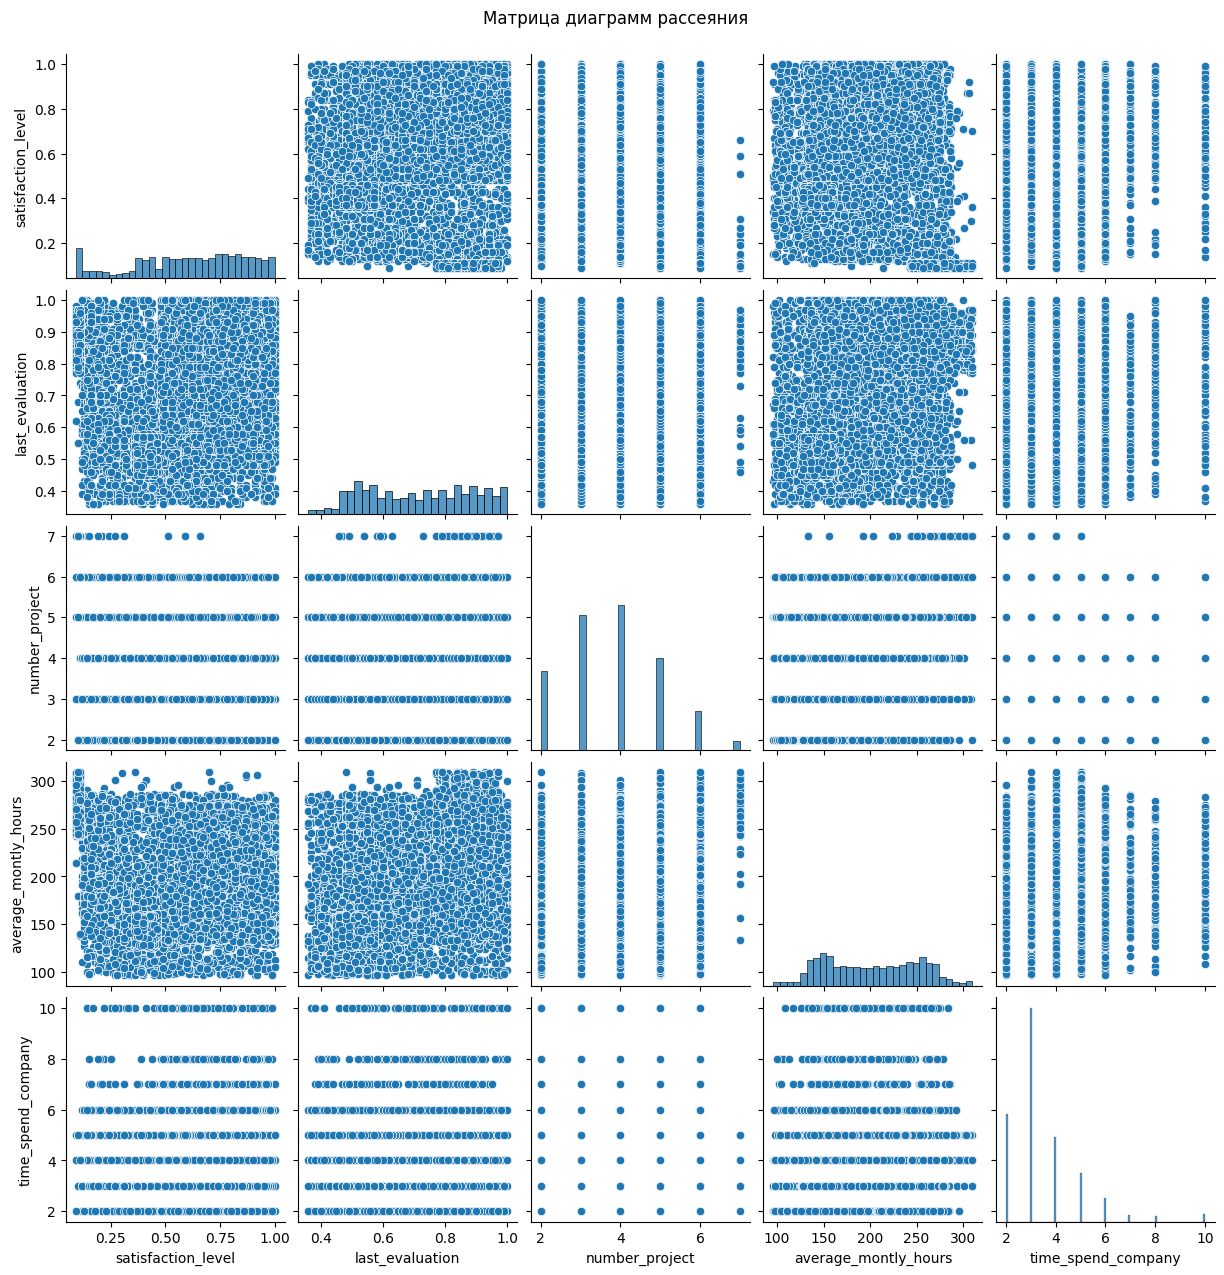

In [33]:
# Строим график для понимания о взаимосвязи количественных признаков
df_numeric = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

sns.pairplot(df_numeric)
plt.suptitle('Матрица диаграмм рассеяния', y = 1.02)
plt.show()

Судя по матрицу рассеяния графики имеют ненормальное распределение, а связи сложно назвать линейными

**Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные**

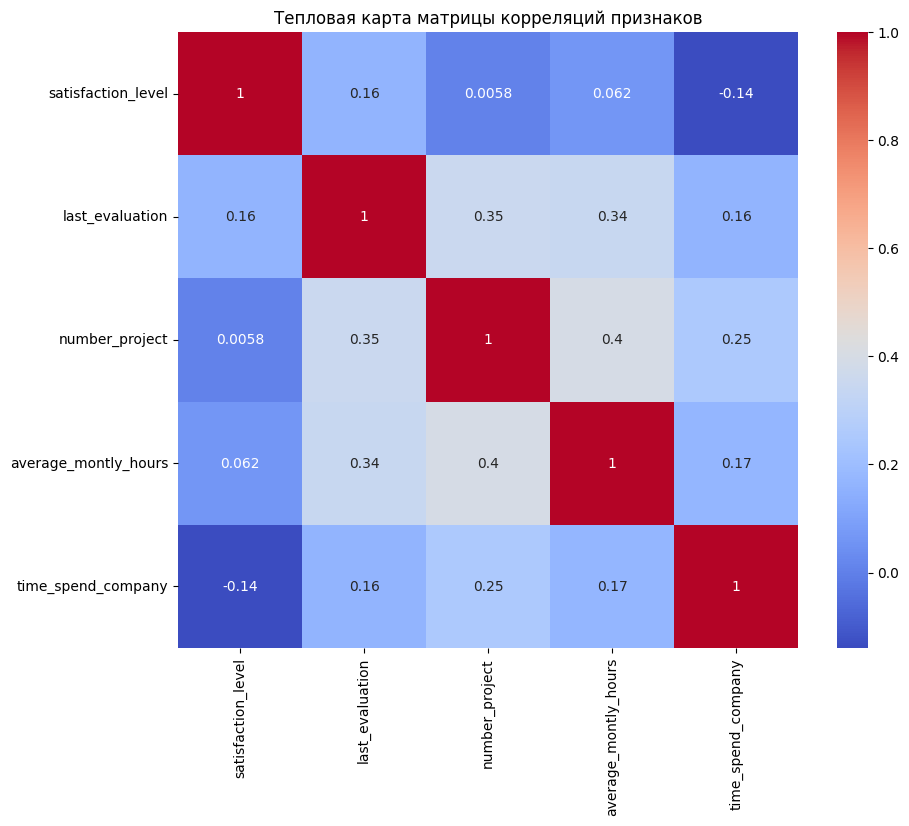

In [32]:
# Создаем датафрейм только с колличественными переменными. Выбираем матрицу Спирмена в связи с ненормальным распределением.
correlation_matrix = df_numeric.corr(method = 'spearman')

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Тепловая карта матрицы корреляций признаков')
plt.show()

Опираясь на матрицу корреляции можно определить что наиболее сильная положительная корреляция между количеством проектов и средним количеством часов (0.4), проведенем на рабочем месте, а также между стажем работы в компании и уровнем удовлетворенности (- 0.14). Наименее скореллированные показатели - кол-во проектов и уровень удовлетворенности (0.0058), сркднее количество часов, проведенное на работе и уроыень удовлетворенности (0.062).

**Рассчитайте сколько сотрудников работает в каждом департаменте**

In [39]:
# Создаем отдельный датафрейм только для тех работников, которые есть сейчас в компании 
df_employees = df.loc[df['left'] == 0]

# Распределяем всех работников по департаментам
df_employee_departments = df_employees.groupby('department')['left'].count()
df_employee_departments

department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: left, dtype: int64

**Покажите распределение сотрудников по зарплатам**

/var/folders/dn/zwr5h4y129gdz0vh13yd5vgr0000gp/T/ipykernel_76687/4038394247.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_employee_salary = df_employees.groupby('salary')['left'].count().reset_index()


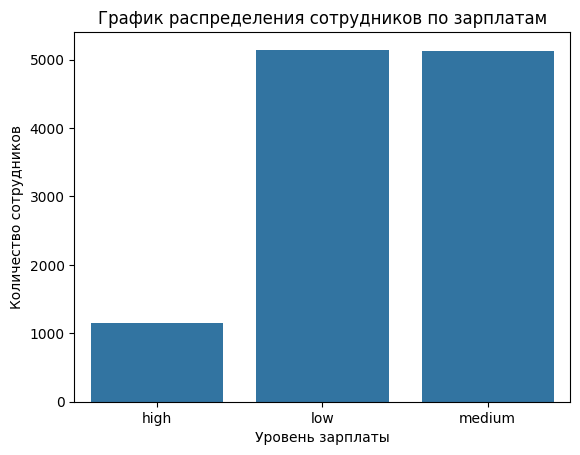

In [43]:
# Группируем сотрудников по уровню зарплаты
df_employee_salary = df_employees.groupby('salary')['left'].count().reset_index()

# Строим график
sns.barplot(data = df_employee_salary, x = 'salary', y = 'left')
plt.title('График распределения сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

Опираясь на данные графика распределения сотрудников по уровню зарплат, можно сказать, что большая часть сотрудников низкую или среднюю зарплату, примерно, в равных соотношениях, и совсем небольшая часть сотрудников получает высокую зарплату.

**Покажите распределение сотрудников по зарплатам в каждом департаменте по отдельности**

/var/folders/dn/zwr5h4y129gdz0vh13yd5vgr0000gp/T/ipykernel_76687/3806642459.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_salary_department = df_employees.groupby(['department', 'salary'])['left'].size().reset_index(name = 'count')


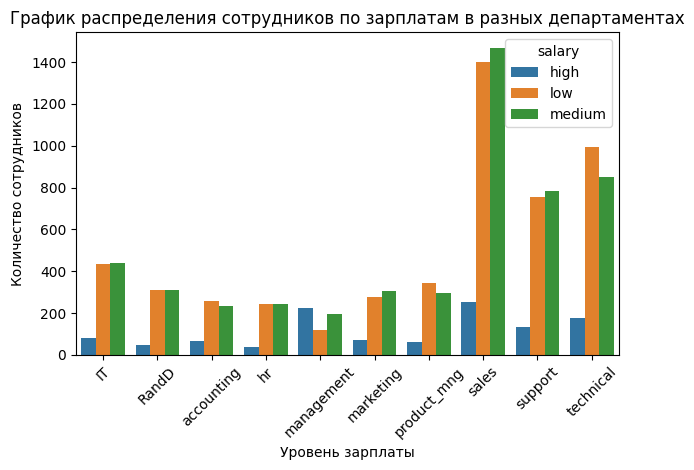

In [97]:
# Создаем детафрейм для рассчет зарплаты по департаменатм
df_salary_department = df_employees.groupby(['department', 'salary'])['left'].size().reset_index(name = 'count')

# Строим график
sns.barplot(data = df_salary_department, x = 'department', y = 'count', hue='salary')
plt.title('График распределения сотрудников по зарплатам в разных департаментах')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

Изучая график распределения уровня зарплаты по департаментам, то можно сказать, что отдел менеджмента единственный, где больший процент сотрудников получает высокую и среднюю зарплату, во всех остальных департаментах примерно одинаковый процент сотрудников получает низкую или среднюю зарплату.

**Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

/var/folders/dn/zwr5h4y129gdz0vh13yd5vgr0000gp/T/ipykernel_76687/2611479329.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_salary = df.groupby('salary')['average_montly_hours'].mean().reset_index()


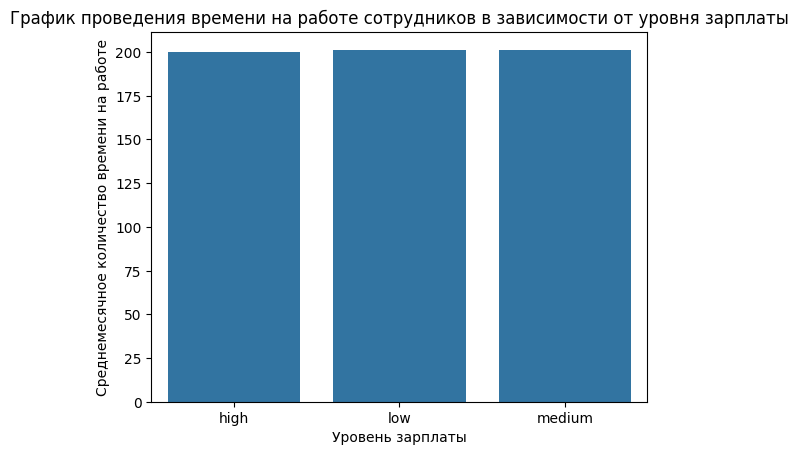

In [63]:
# Построим график

df_grouped_salary = df.groupby('salary')['average_montly_hours'].mean().reset_index()

sns.barplot(data = df_grouped_salary, x = 'salary', y = 'average_montly_hours')
plt.title('График проведения времени на работе сотрудников в зависимости от уровня зарплаты')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Среднемесячное количество времени на работе')
plt.show()

Судя по графику, количество времени, которое человек проводит на работе, никак не влияет на его зарплату. Подтвердим это тестами.

In [69]:
# Проверим распределение
# Выделяем датафрейм с низким заработком и высоким
df_low = df[df['salary'] == 'low']['average_montly_hours']
df_high = df[df['salary'] == 'high']['average_montly_hours']

stat_low, p_low = st.shapiro(df_low)
stat_high, p_high = st.shapiro(df_high)

if p_low > 0.05 and p_high > 0.05:
    print('Оба показателя имеют нормальное распределение')
else:
    print('Хотя бы одно распределение будет ненормальным')

Хотя бы одно распределение будет ненормальным


In [98]:
# Применяем тест Манна-Уитни
stat, p = st.mannwhitneyu(df_low, df_high, alternative = 'greater')

if p > 0.05:
    print('Нет оснований полагать, что время проведенное на работе влияет на уровень зарплаты')
else:
    if df_high.mean() > df_low.mean():
        print('Работники, которые проводят времени больше на работе, получают зарплату выше')
    else:
        print('Работники, которые проводят времени меньше на работе, получают зарплату выше')

Нет оснований полагать, что время проведенное на работе влияет на уровень зарплаты


**Рассчитайте следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):** 
1. Доля сотрудников с повышением за последние 5 лет
2. Средняя степень удовлетворенности
3. Среднее количество проектов

In [81]:
# Рассчет для сотрудников, которые не уволились 
# Доля сотрудников с повышением за последние 5 лет
employees_promotion_count = len(df_employees['promotion_last_5years'])
employees_with_promotion = len(df_employees[df_employees['promotion_last_5years'] == 1])
part_of_promotion = round(employees_with_promotion / employees_promotion_count, 2)

# Средняя степень удовлетворенности
average_satisfaction_level = round(df_employees['satisfaction_level'].mean(), 2)

# Среднее количество проектов
average_number_project = round(df_employees['number_project'].mean(), 2)

print(f'Рассчет для сотрудников, которые не уволились \n'
      f'Доля сотрудников с повышением за последние 5 лет: {part_of_promotion}\n'
      f'Средняя степень удовлетворенности: {average_satisfaction_level}\n'
      f'Среднее количество проектов: {average_number_project}')

Рассчет для сотрудников, которые не уволились 
Доля сотрудников с повышением за последние 5 лет: 0.03
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79


In [82]:
# Рассчет для сотрудников, которые уволились 
# Выделяем отдельный датафрейм для уволившиъся сотрудников
df_fire_employees = df.loc[df['left'] == 1]

# Доля сотрудников с повышением за последние 5 лет
fire_employees_promotion_count = len(df_fire_employees['promotion_last_5years'])
fire_employees_with_promotion = len(df_fire_employees[df_fire_employees['promotion_last_5years'] == 1])
fire_part_of_promotion = round(fire_employees_with_promotion / fire_employees_promotion_count, 2)

# Средняя степень удовлетворенности
fire_average_satisfaction_level = round(df_fire_employees['satisfaction_level'].mean(), 2)

# Среднее количество проектов
fire_average_number_project = round(df_fire_employees['number_project'].mean(), 2)

print(f'Рассчет для сотрудников, которые уволились \n'
      f'Доля сотрудников с повышением за последние 5 лет: {fire_part_of_promotion}\n'
      f'Средняя степень удовлетворенности: {fire_average_satisfaction_level}\n'
      f'Среднее количество проектов: {fire_average_number_project}')

Рассчет для сотрудников, которые уволились 
Доля сотрудников с повышением за последние 5 лет: 0.01
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86


Опираясь на статистические рассчеты, доля сотрудников с повышением выше среди оставшихся сотрудников. Средняя степень удовлетворенности выше также среди оставшихся сотрудников. Среднее количество проектов, которые выполняют сотрудники все же выше среди уволившихся, но не намного. 

**Разделите данные на тестовую и обучающую выборки.** 

**Постройте модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).**

**Оцените качество модели на тестовой выборке**

In [101]:
# Выделим целевую и зависимые переменные
x = df.drop(columns = ['department', 'salary', 'left'], axis = 1)

y = df['left']

In [102]:
# Разделим данные на тестовую и тренировочную выборки, учитывая стратификацию
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, stratify = y)


In [103]:
# Строим модель
lda = LinearDiscriminantAnalysis()

# Обучаем модель
lda.fit(x_train, y_train)

# Делаем прогноз
lda_predictions = lda.predict(x_test)

# Выводим оценку качества модели 
print(classification_report(y_test, lda_predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2857
           1       0.50      0.25      0.34       893

    accuracy                           0.76      3750
   macro avg       0.65      0.59      0.60      3750
weighted avg       0.73      0.76      0.73      3750



По данным оценки можно сказать, что наша модель достаточно точно определила количество оставшихся сотрудников (0.8) и не не очень точно определи сотрудников, которые уволились (0.5). При этом доля правильно найденных моделью оставшихся сотрудников достаточно высока (0.92), а вот доля найденных уволившихся сотрудников, наоборот, крайне низка (0.25). В целом accuracy нашей модели достаточно высока (0.76), что говорит о том, что она классифицирует работников точно, несмотря на проблемы с нахождением уволившихся сотрудников.